# <center>2024 Noto Earthquake Swarm Project</center>
<center>by: Haidir Jibran</center>
<center>haidirjibran@gmail.com</center>

In [63]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

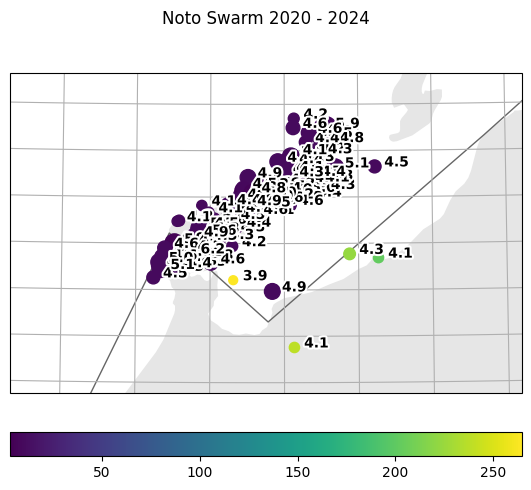

In [64]:
latitude = 37.5
longitude = 137
maxradius = 1
starttime = UTCDateTime('2020-08-01')
endtime = UTCDateTime('2024-08-30')

client = Client('IRIS')
events = client.get_events(starttime=starttime, endtime=endtime, longitude=longitude, latitude=latitude, maxradius=maxradius)
events.plot(projection='local', title="Noto Swarm 2020 - 2024")
plt.close()

In [65]:
os.system('FetchEvent -s 2020-08-01,00:00:00 -e 2024-08-30,00:00:00 --radius 37.5:137:1 -o events.txt')

sh: 1: FetchEvent: not found


32512